# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import countplot
from matplotlib.pyplot import figure, show
from scipy import stats
import warnings
import gc
warnings.filterwarnings('ignore')

#warnings.filterwarnings('default')

# Load Data

In [2]:
df = pd.read_csv('C:/Users/vardh/OneDrive/Desktop/ML_Proj/Autoencoder/DG_out.csv',dtype={0:'object',1:'int64',2:'int64',3:'float64',4:'float64',5:'float64',6:'float64',7:'float64',8:'int64',9:'int64',10:'int64',11:'int64',12:'int64'})

# EDA

In [3]:
df.head()

tx_hash  indegree  outdegree  \
0  0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...         0          1   
1  f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...         1          2   
2  ea44e97271691990157559d0bdd9959e02790c34db6c00...         1          1   
3  a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...         1          1   
4  591e91f809d716912ca1d4a9295e70c3e78bab077683f7...         1          2   

   in_btc  out_btc  total_btc  mean_in_btc  mean_out_btc  in_malicious  \
0     0.0     50.0       50.0          0.0          50.0             0   
1    50.0     50.0      100.0         50.0          25.0             0   
2    10.0     10.0       20.0         10.0          10.0             0   
3    40.0     30.0       70.0         40.0          30.0             0   
4    30.0     30.0       60.0         30.0          15.0             0   

   out_malicious  is_malicious  out_and_tx_malicious  all_malicious  
0              0             0                     0              0  
1              0             0                     0              0  
2              0             0                     0              0  
3              0             0                     0              0  
4              0             0                     0              0

In [4]:
df.shape

(30248134, 13)

In [5]:
pd.options.display.float_format = '{:.3f}'.format
o_df = df.iloc[:,1:8]
o_df.describe()

indegree    outdegree       in_btc      out_btc    total_btc  \
count 30248134.000 30248134.000 30248134.000 30248134.000 30248134.000   
mean         2.149        2.149       54.842       54.842      109.683   
std          7.421        4.512     1303.303     1301.473     2602.527   
min          0.000        0.000        0.000        0.000        0.000   
25%          1.000        2.000        0.100        0.100        0.206   
50%          1.000        2.000        0.932        0.959        1.965   
75%          2.000        2.000        8.592        9.064       18.400   
max       1932.000     1322.000   550000.000   500020.700  1050000.000   

       mean_in_btc  mean_out_btc  
count 30248134.000  30248134.000  
mean        49.240        28.771  
std        972.921       712.557  
min          0.000         0.000  
25%          0.064         0.050  
50%          0.535         0.490  
75%          5.614         4.519  
max     499259.588    500000.000

# Logged data distributions

In [57]:
# Apply the natural logarithm to the dataframe and replace -inf with -1
log_o_df1 = np.log(o_df).replace(-np.inf, -1)

In [58]:
# Verify the transformation
log_o_df1.describe()

indegree    outdegree       in_btc      out_btc    total_btc  \
count 30248134.000 30248134.000 30248134.000 30248134.000 30248134.000   
mean         0.381        0.635       -0.041       -0.041        0.670   
std          0.646        0.373        2.832        2.885        2.858   
min         -1.000       -1.000      -18.421      -18.421      -18.421   
25%          0.000        0.693       -2.249       -2.283       -1.581   
50%          0.000        0.693       -0.070       -0.042        0.675   
75%          0.693        0.693        2.151        2.204        2.912   
max          7.566        7.187       13.218       13.122       13.864   

       mean_in_btc  mean_out_btc  
count 30248134.000  30248134.000  
mean        -0.431        -0.682  
std          2.895         2.871  
min        -18.421       -18.421  
25%         -2.649        -2.918  
50%         -0.625        -0.713  
75%          1.725         1.508  
max         13.121        13.122

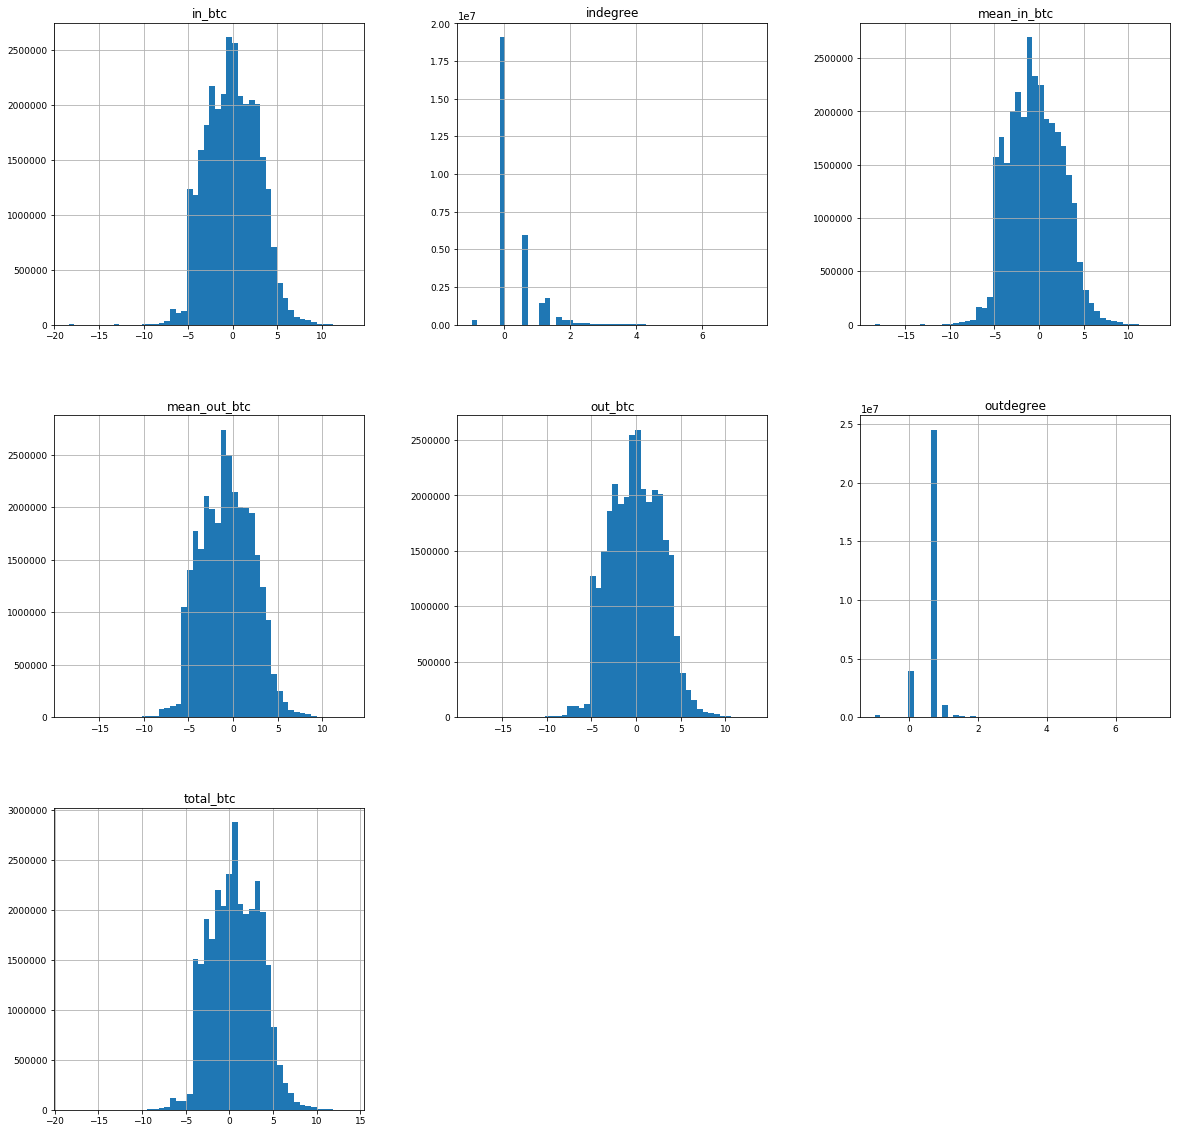

In [60]:
# Create histograms for the log-transformed dataframe
log_o_df1.hist(figsize=(20, 20), bins=50, xlabelsize=9, ylabelsize=9, log=False)

# Display the plots
plt.show()

### Transformation Log Data Distributions

In [61]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
rob_scaler = RobustScaler()

# Define the columns to be scaled
columns_to_scale = ['indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc', 'mean_in_btc', 'mean_out_btc']

# Scale the specified columns in the DataFrame without reshaping
scaled_df[columns_to_scale] = rob_scaler.fit_transform(scaled_df[columns_to_scale])

In [62]:
pd.options.display.float_format = '{:.6f}'.format
scaled_df.describe()

indegree       outdegree          in_btc         out_btc  \
count 30248134.000000 30248134.000000 30248134.000000 30248134.000000   
mean         0.549295       -0.058114        0.006613        0.000223   
std          0.931814        0.373407        0.643707        0.643069   
min         -1.442695       -1.693147       -4.170404       -4.096177   
25%          0.000000        0.000000       -0.495322       -0.499392   
50%          0.000000        0.000000        0.000000        0.000000   
75%          1.000000        0.000000        0.504678        0.500608   
max         10.915879        6.493754        3.019732        2.933985   

            total_btc     mean_in_btc    mean_out_btc  
count 30248134.000000 30248134.000000 30248134.000000  
mean        -0.001203        0.044424        0.007085  
std          0.636120        0.661765        0.648637  
min         -4.250319       -4.068037       -4.000418  
25%         -0.502102       -0.462612       -0.498066  
50%          0.000000        0.000000        0.000000  
75%          0.497898        0.537388        0.501934  
max          2.935537        3.142444        3.125747

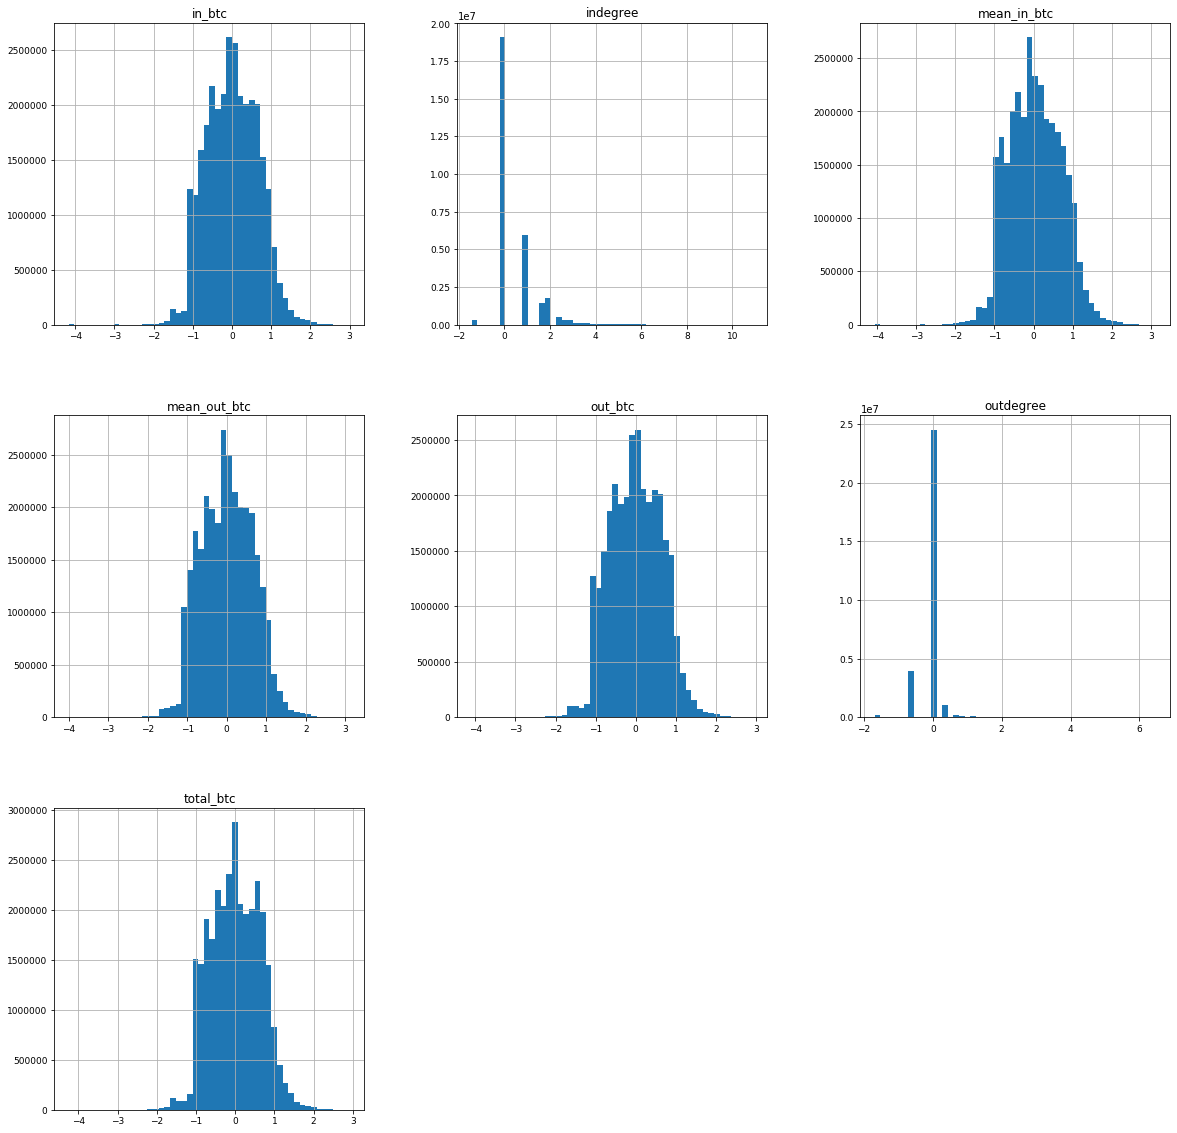

In [63]:
# Create histograms for the scaled dataframe
scaled_df.hist(figsize=(20, 20), bins=50, xlabelsize=9, ylabelsize=9, log=False)

# Display the plots
plt.show()

# CHECK HOW MUCH ANOMALOUS DATA YOU ARE LOOSING ON REMOVING OUTLIERS

In [191]:
hacks_tx_data = df + "bitcoin_hacks_2011_2013.csv"
mtx = [line.strip() for line in open(hacks_tx_data, 'r')]

malicious_in_tx = df + "mtxin.csv"
mtxin = [line.strip() for line in open(malicious_in_tx, 'r')]

malicious_out_tx = df + "mtxout.csv"
mtxout = [line.strip() for line in open(malicious_out_tx, 'r')]

anomalies = mtx + mtxin + mtxout

hashes = list(df_ao['tx_hash'])

mtxin_c = sum(1 for item in mtx if item in hashes)
mtxout_c = sum(1 for item in mtxout if item in hashes)
mtx_c = sum(1 for item in anomalies if item in hashes)

In [192]:
print('Simple known malicious transaction loss: ' + str(100-((mtx_c*100)/len(mtx))) + '%' + ' => ' + str(mtx_c)+'/'+str(len(mtx)))
print('Malicious In-transaction loss: ' + str(100-((mtxin_c*100)/len(mtxin))) + '%' + ' => ' + str(mtxin_c)+'/'+str(len(mtxin)))
print('Malicious Out-transaction loss: ' + str(100-((mtxout_c*100)/len(mtxout))) + '%' + ' => ' + str(mtxout_c)+'/'+str(len(mtxout)))
print('Malicious Total loss: ' + str(100-(((mtxout_c+mtxin_c+mtx_c)*100)/len(anomalies))) + '%' + ' => ' + str(mtxout_c+mtxin_c+mtx_c)+'/'+str(len(anomalies)))

Simple known malicious transaction loss: 29.787234042553195% => 33/47
Malicious In-transaction loss: 17.779565567176192% => 1022/1243
Malicious Out-transaction loss: 22.98850574712644% => 67/87
Malicious Total loss: 18.51851851851852% => 1122/1377


# Feature to feature relationship

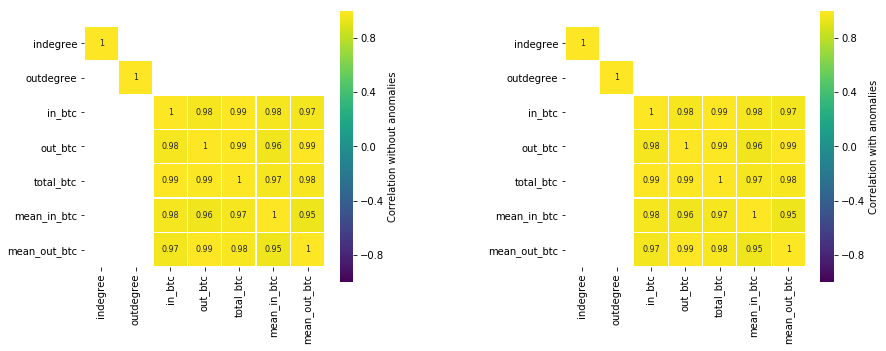

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_ao = log_df_ao_trim.corr()
corr_o = log_df_o_trim.corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=None)

sns.heatmap(corr_ao[(corr_ao >= 0.5) | (corr_ao <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True, cbar_kws={'label': 'Correlation without anomalies'}, ax=ax1)

sns.heatmap(corr_o[(corr_o >= 0.5) | (corr_o <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, cbar_kws={'label': 'Correlation with anomalies'}, square=True, ax=ax2)

plt.show()

# Pair-plots

In [ ]:
m_pair_df = df_ao

m_plot_df = m_pair_df.iloc[:,1:8]
m_col = m_pair_df.iloc[:,8:13]

# Mapping for descriptive labels
malicious_mapping = {1: 'Malicious', 0: 'Non-Malicious'}

# Apply mappings to relevant columns
m_col = m_col.replace({
    'in_malicious': malicious_mapping,
    'out_malicious': malicious_mapping,
    'is_malicious': malicious_mapping,
    'out_and_tx_malicious': malicious_mapping,
    'all_malicious': malicious_mapping
})

# Rename columns for better readability
m_plot_df = m_plot_df.rename(columns={
    'in_malicious': 'Input-Malicious-Transactions',
    'out_malicious': 'Output-Malicious-Transactions',
    'is_malicious': 'Genuine-Malicious-Transactions'
})

### Malicious Input-Transaction

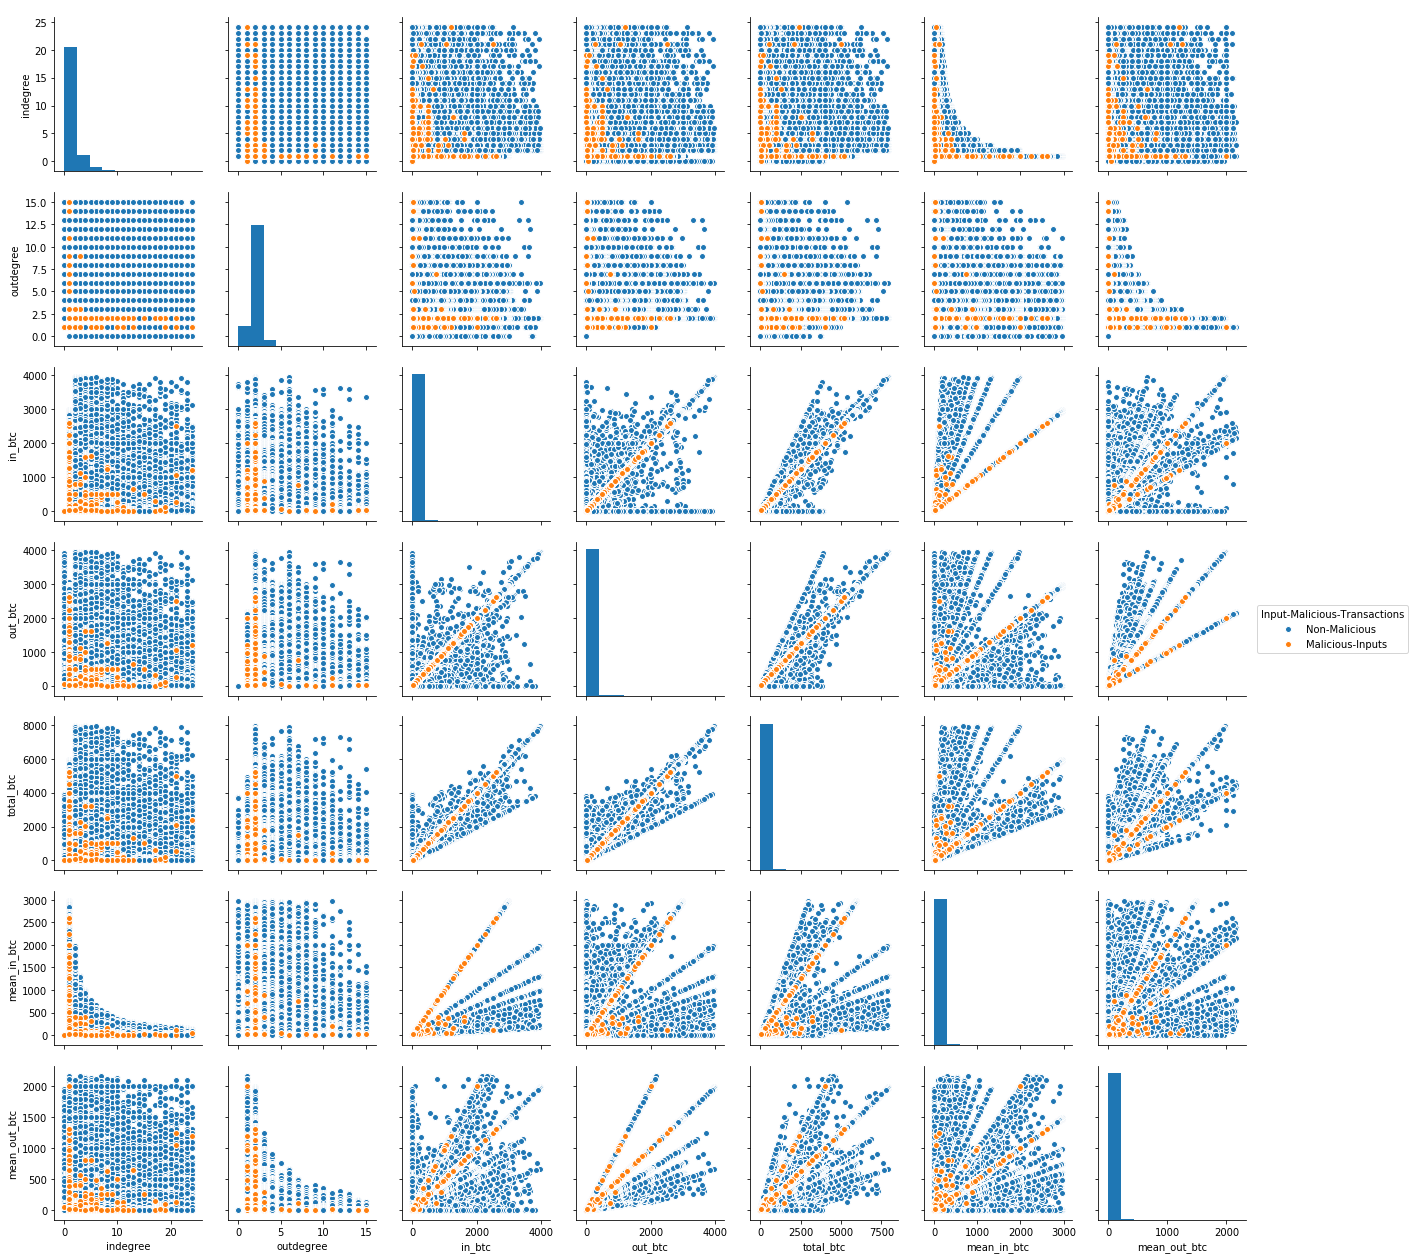

In [10]:
import seaborn as sns

sample_size = 100000
sns.pairplot(m_plot_df.sample(sample_size), hue='Input-Malicious-Transactions', plot_kws={'alpha':0.5})

### Malicious Output Transactions

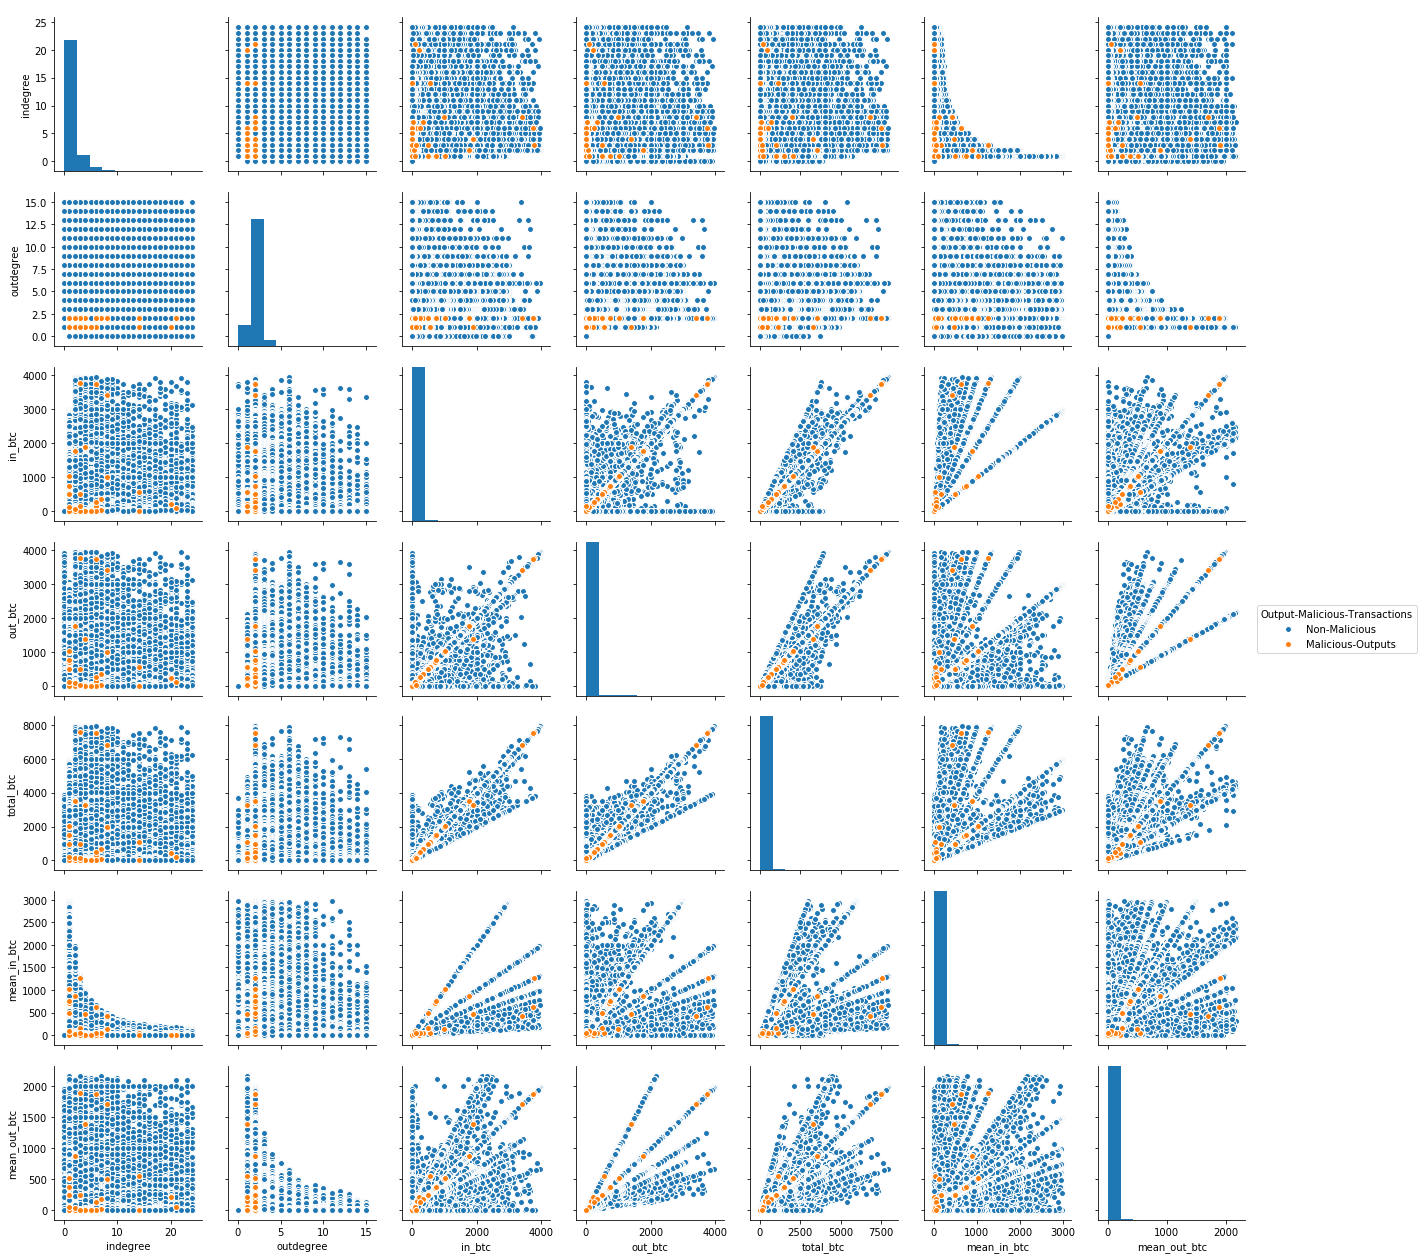

In [11]:
sns.pairplot(m_plot_df, hue='Output-Malicious-Transactions', plot_kws={'alpha':0.5})

### Malicious Genuine Transaction

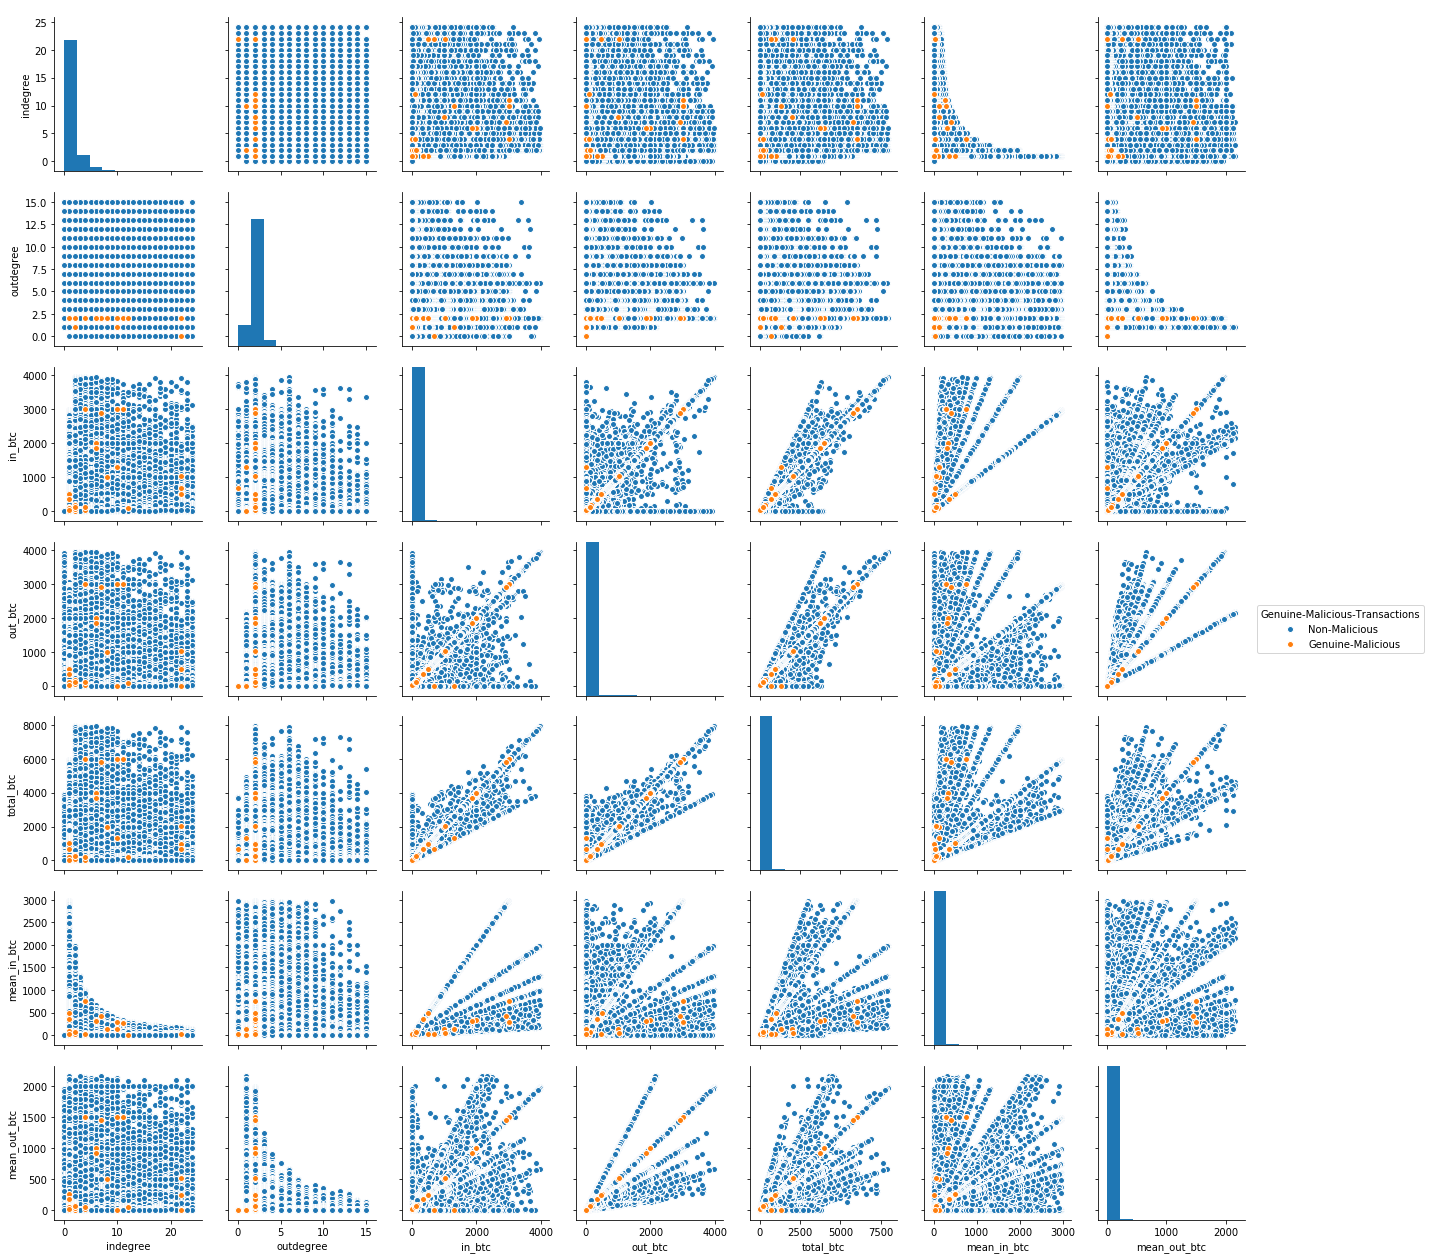

In [8]:
sns.pairplot(m_plot_df, hue='Genuine-Malicious-Transactions', plot_kws={'alpha':0.5})

## Log Pair Plot

In [12]:
m_pair_df = df_ao

log_plot_df_ao = log_df_ao_trim
m_col = m_pair_df.iloc[:,8:13]

m_col['in_malicious'] = m_col['in_malicious'].map({1: 'Malicious-Inputs', 0: 'Non-Malicious'})
m_col['out_malicious'] = m_col['out_malicious'].map({1: 'Malicious-Outputs', 0: 'Non-Malicious'})
m_col['is_malicious'] = m_col['is_malicious'].map({1: 'Genuine-Malicious', 0: 'Non-Malicious'})

log_plot_df_ao['Input-Malicious-Transactions'] = m_col['in_malicious']
log_plot_df_ao['Output-Malicious-Transactions'] = m_col['out_malicious']
log_plot_df_ao['Genuine-Malicious-Transactions'] = m_col['is_malicious']


### Malicious Input Transaction (Log)

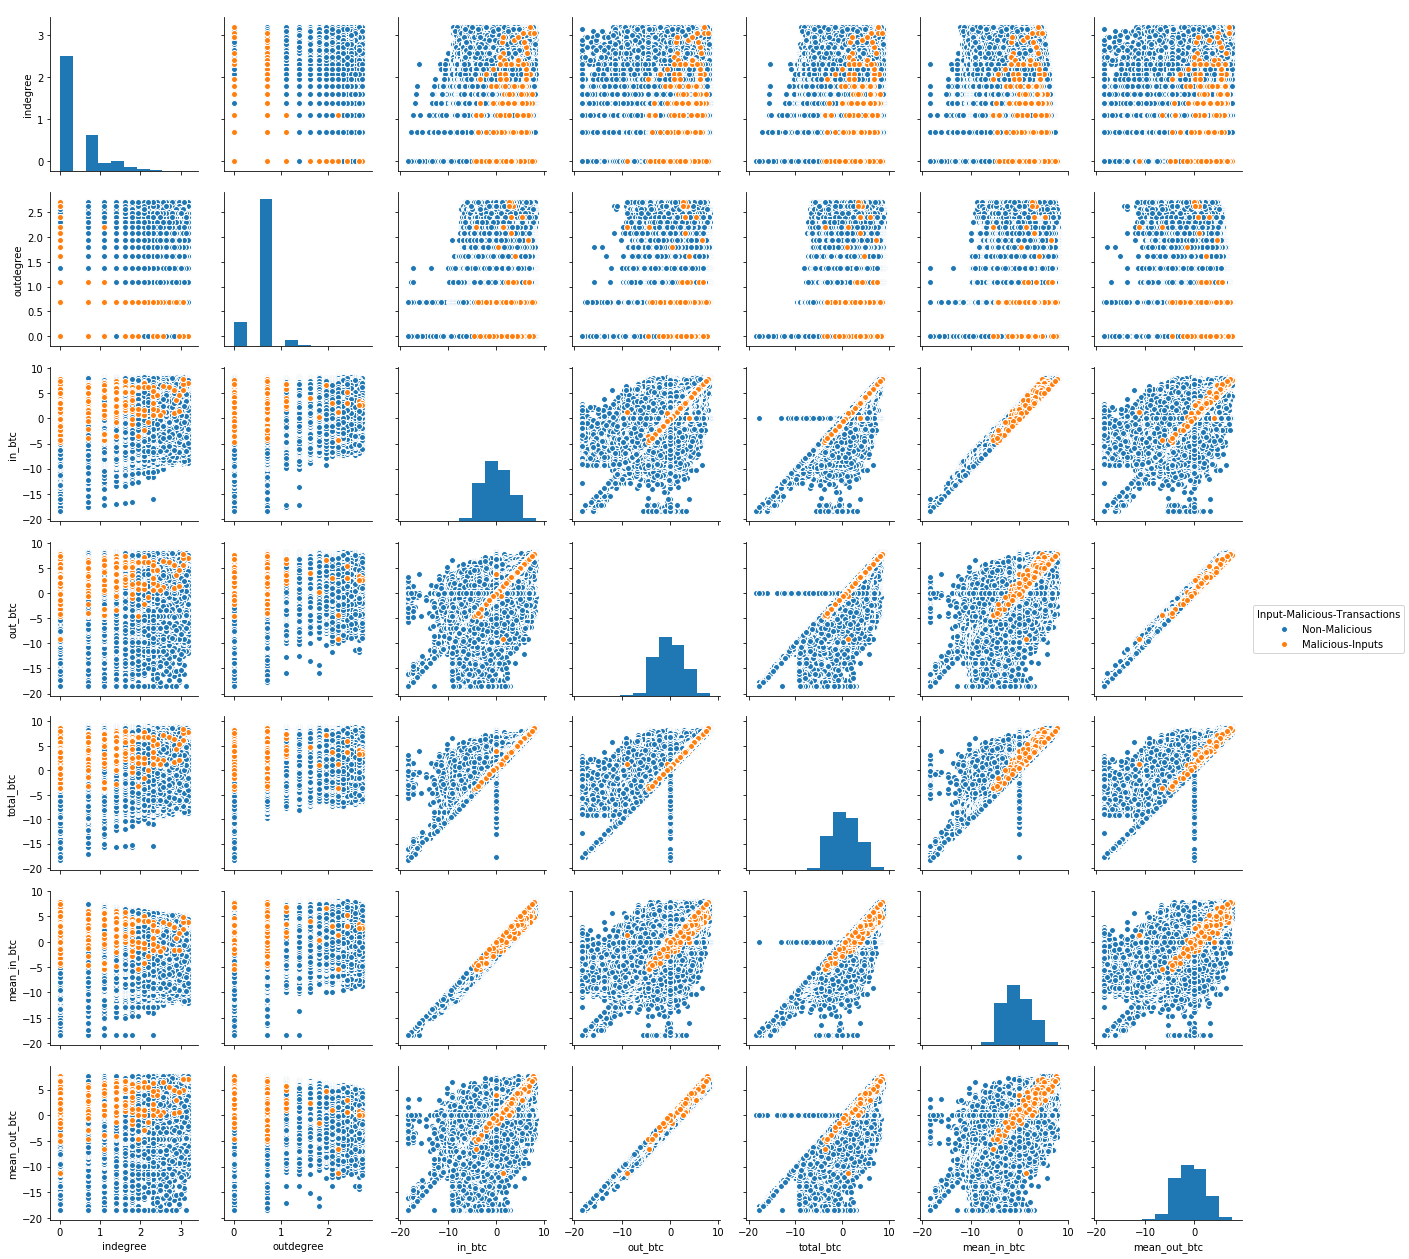

In [17]:
sns.pairplot(log_plot_df_ao, hue='Input-Malicious-Transactions', plot_kws={'alpha': 0.5})

### Malicious Output Transaction (Log)

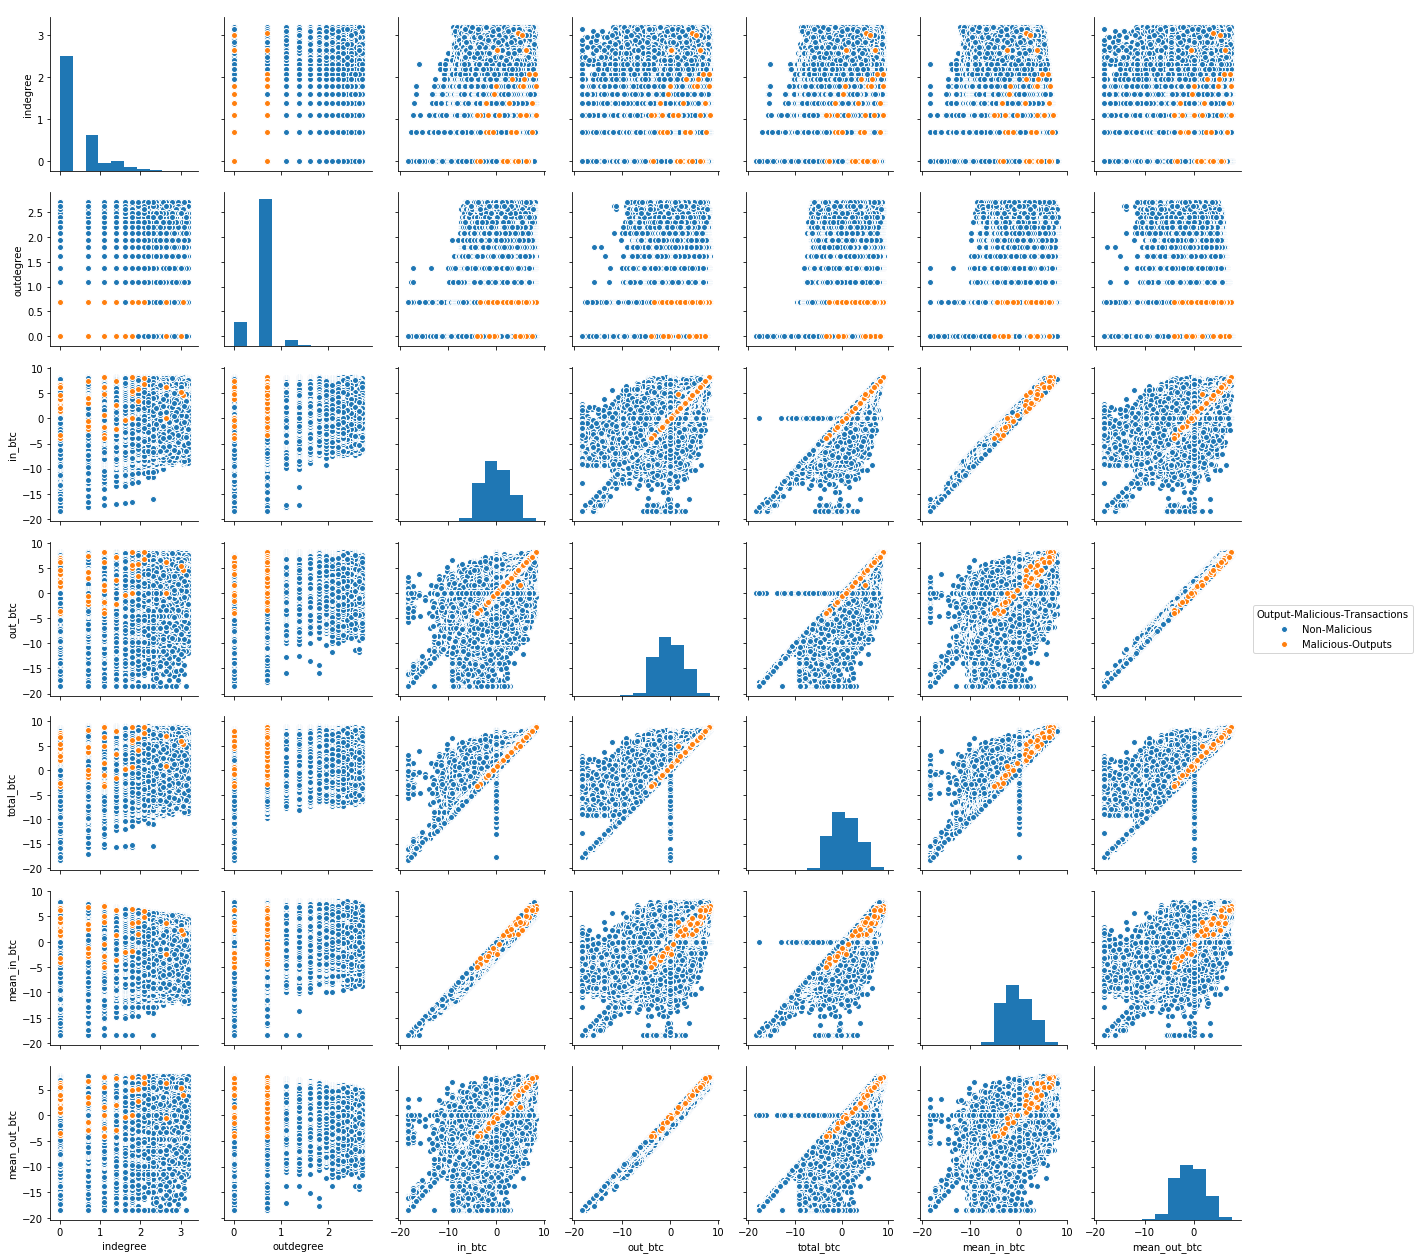

In [18]:
sns.pairplot(log_plot_df_ao, hue = 'Output-Malicious-Transactions', plot_kws={'alpha': 0.5})

### Malicious Genuine Transaction (Log)

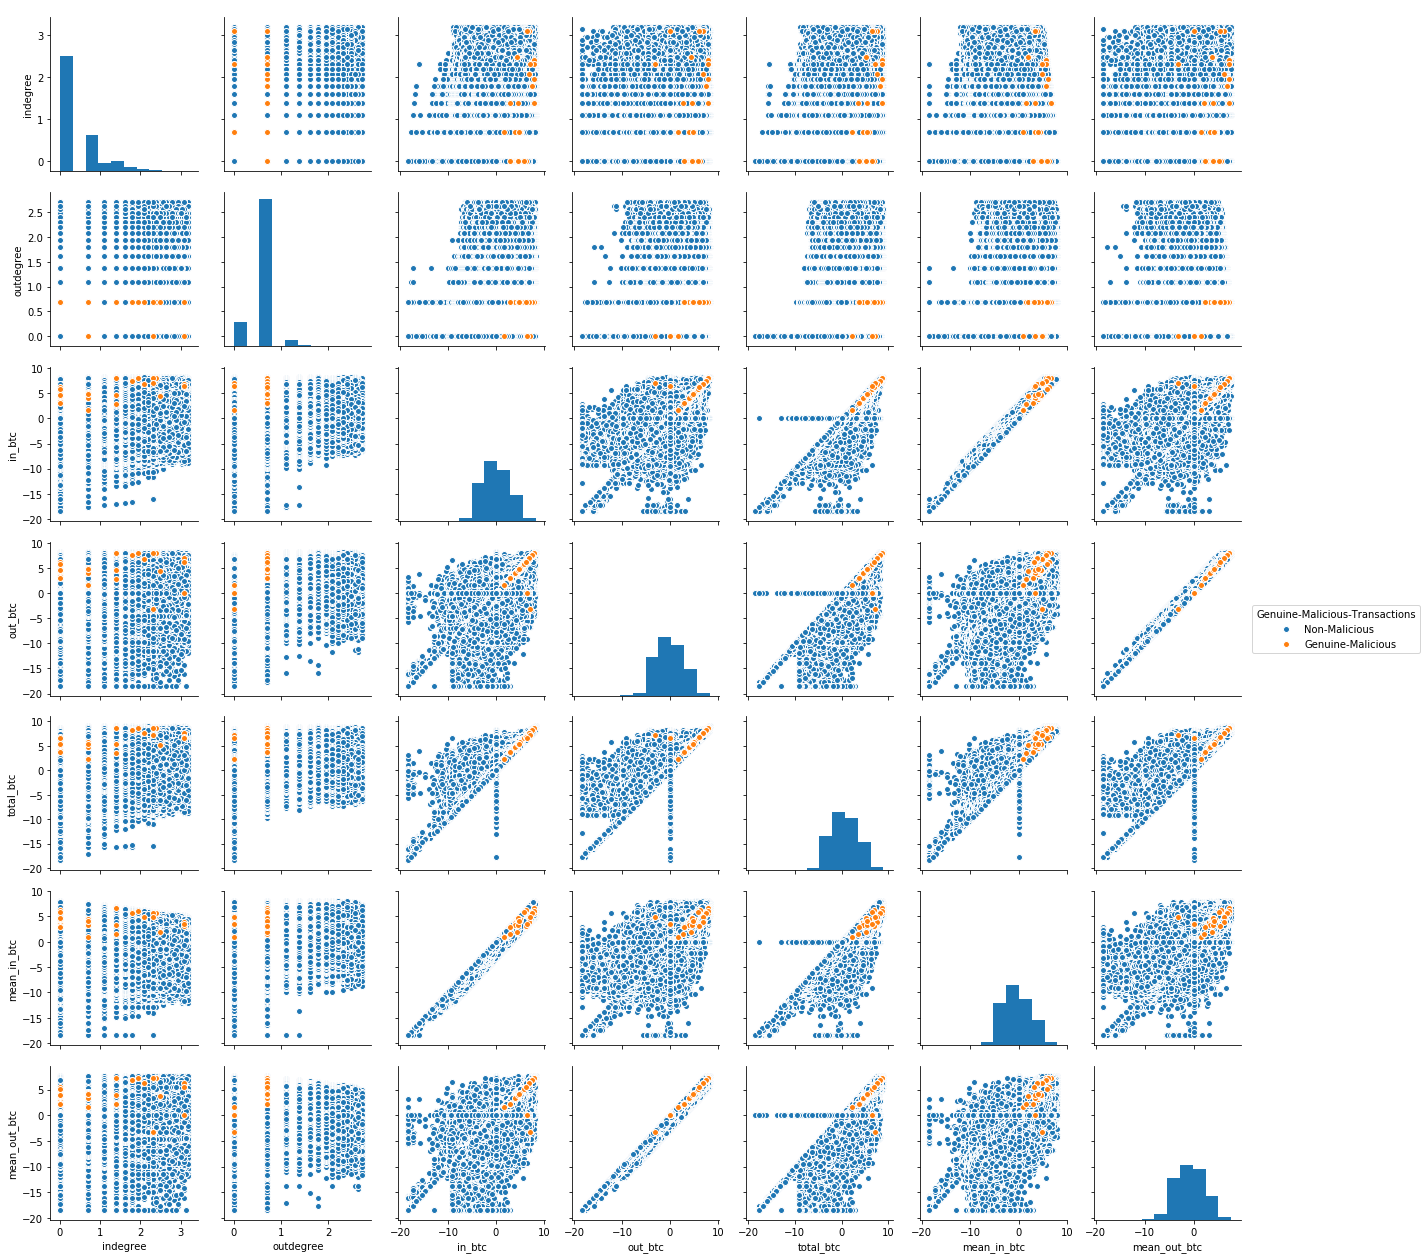

In [10]:
sns.pairplot(log_plot_df_ao, hue = 'Genuine-Malicious-Transactions', plot_kws={'alpha': 0.5})

# Malicious Activity Visualization

In [54]:
temp_df = log_plot_df_ao

total_tx = len(temp_df)
input_tx = temp_df['Input-Malicious-Transactions'].value_counts().get('Malicious-Inputs', 0)
output_tx = temp_df['Output-Malicious-Transactions'].value_counts().get('Malicious-Outputs', 0)
genuine_tx = temp_df['Genuine-Malicious-Transactions'].value_counts().get('Genuine-Malicious', 0)

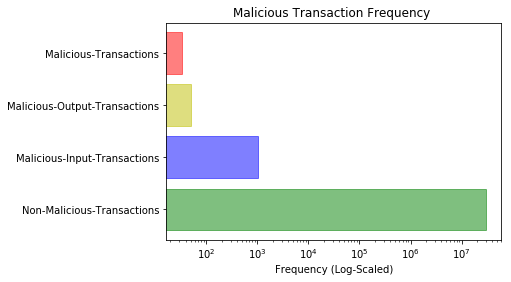

In [74]:
total = total_tx-input_tx-output_tx-genuine_tx
labels = 'Big','Malicious-Inputs', 'Malicious-Outputs', 'Malicious-Transactions'

objects = ('Non-Malicious-Transactions','Malicious-Input-Transactions', 'Malicious-Output-Transactions', 'Malicious-Transactions')
y_pos = np.arange(len(objects))
performance = [total, input_tx, output_tx, genuine_tx]
 
barp = plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
barp[0].set_color('g')
barp[1].set_color('b')
barp[2].set_color('y')
barp[3].set_color('r')
plt.xlabel('Frequency (Log-Scaled)')
plt.title('Malicious Transaction Frequency ')
plt.xscale("log")
plt.show()